In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
# data of format id,x,y
df = pd.read_csv("pos.csv")

df = df[df['floorNumber'] == 1]
df = df[df['time'] > 0]
length = 228.30688
width = 346.92673
height = 13.0
offsetX = 14.67
offsetY = 21.18
imageWidth = 4162
imageHeight = 2739

In [27]:
# collect data for each id
ids = df['id'].unique()

(1713, 7)


IndexError: single positional indexer is out-of-bounds

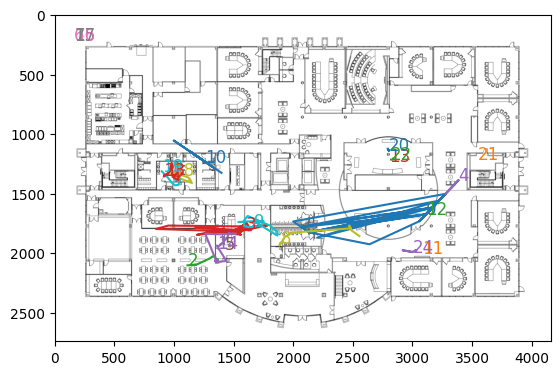

In [31]:
# filter out the ids that are stationary (don't move)
# ids = [id for id in ids if len(df[df['id'] == id]) > 10]

plt.imshow(plt.imread('floor1.png'))

# ids = ids[:20]
# filter df to only contain the ids we are interested in
# df = df[df['id'].isin(ids)]

df = df[df['confidence'] < 60]

print(df.shape)
j = 0
for id in ids:
    data = df[df['id'] == id]
    datax = data['x'].rolling(window=1).mean()
    datay = data['y'].rolling(window=1).mean()
    
    datax = (datax + offsetX) / (width + 2 * offsetX) * imageWidth
    datay = (datay + offsetY) / (length + 2 * offsetY) * imageHeight
    p = plt.plot(datax, datay, label=id)
    plt.text(datax.iloc[-1], datay.iloc[-1], j, fontsize=12, color=p[0].get_color())
    j += 1

    # if datax.min() < 300 and datay.min() < 300:
    #     print(id)
    #     print(df[df['id'] == id])
plt.savefig('plot.png', dpi=300)
plt.show()

In [29]:
df[df['id'] == ids[8]]

,id,time,floorNumber,x,y,confidence,deviceType
267,device-GZLFni5pfyyDldU0n8jS,1710988134056,1,216.3,162.2,16.0,NaN
268,device-GZLFni5pfyyDldU0n8jS,1710988136615,1,216.3,162.2,16.0,NaN
271,device-GZLFni5pfyyDldU0n8jS,1710988189055,1,210.1,157.3,24.0,NaN
272,device-GZLFni5pfyyDldU0n8jS,1710988192292,1,210.1,157.3,24.0,NaN
273,device-GZLFni5pfyyDldU0n8jS,1710988192547,1,210.1,157.3,24.0,NaN
274,device-GZLFni5pfyyDldU0n8jS,1710988205313,1,208.6,153.5,24.0,NaN
275,device-GZLFni5pfyyDldU0n8jS,1710988207500,1,208.6,153.5,24.0,NaN
828,device-GZLFni5pfyyDldU0n8jS,1710988229054,1,209.8,155.8,32.0,NaN
829,device-GZLFni5pfyyDldU0n8jS,1710988231442,1,209.8,155.8,32.0,NaN
830,device-GZLFni5pfyyDldU0n8jS,1710988231978,1,209.8,155.8,32.0,NaN
